# Машинное обучение. Лабораторная работа №3 - Прогнозирование продаж

Данное решение подготовлено для сдачи лабораторной работы по машинному обучению в рамках курса МАИ. Выполнил: Марков Владимир Игоревич М8О-308Б-22

## Содержание
1. Импорт библиотек и загрузка данных
2. Разведочный анализ данных (EDA)
3. Предобработка данных
4. Обучение модели
5. Оценка метрики MAPE
6. Визуализация результатов
7. Предсказания и создание submission.csv

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [30]:
# Загрузка данных
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Преобразуем дату в формат datetime и создаем дополнительные признаки
train_data["Date"] = pd.to_datetime(train_data["Date"])
test_data["Date"] = pd.to_datetime(test_data["Date"])

train_data["Month"] = train_data["Date"].dt.month
train_data["DayOfWeek"] = train_data["Date"].dt.weekday
test_data["Month"] = test_data["Date"].dt.month
test_data["DayOfWeek"] = test_data["Date"].dt.weekday

# Удаляем столбец с датой
train_data = train_data.drop(columns=["Date"])
test_data = test_data.drop(columns=["Date"])


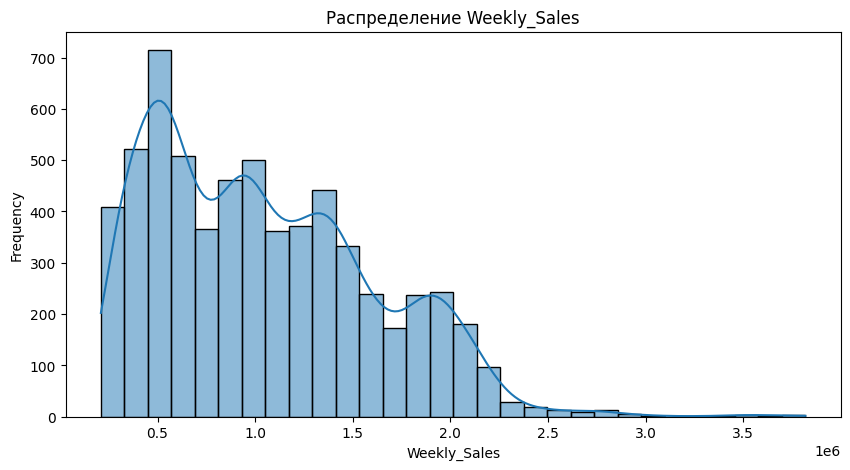

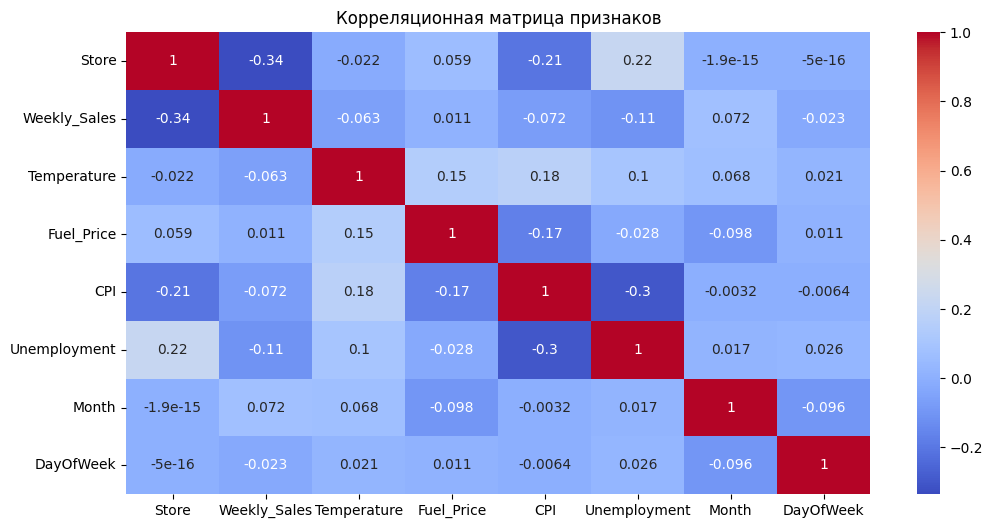

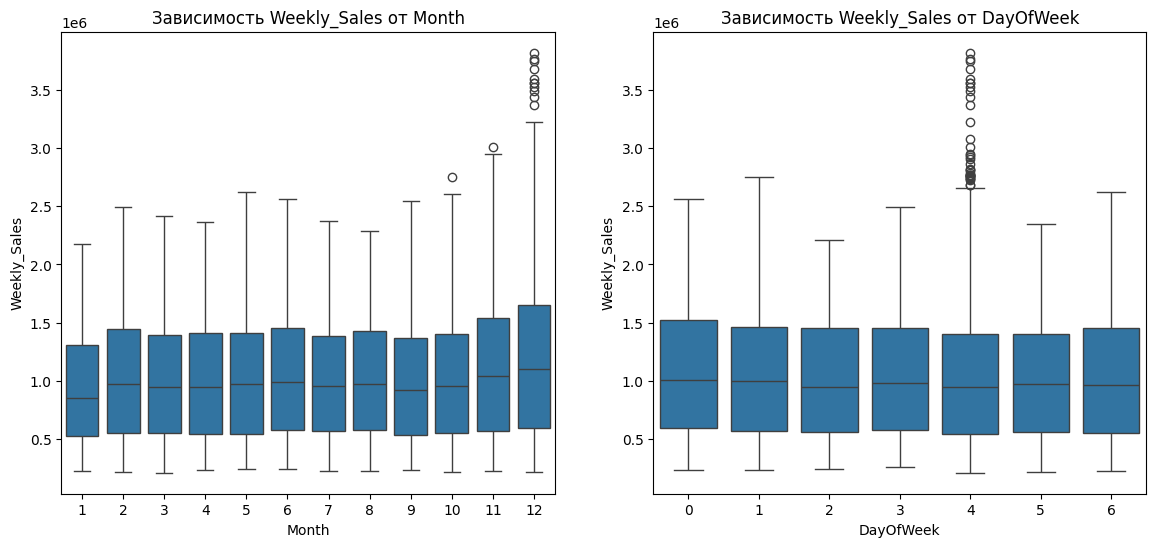

In [31]:
# Визуализируем распределение целевой переменной
plt.figure(figsize=(10, 5))
sns.histplot(train_data["Weekly_Sales"], bins=30, kde=True)
plt.title("Распределение Weekly_Sales")
plt.xlabel("Weekly_Sales")
plt.ylabel("Frequency")
plt.show()

# Визуализация корреляции между признаками
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица признаков")
plt.show()

# Визуализируем зависимость Weekly_Sales от месяца и дня недели
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=train_data, x="Month", y="Weekly_Sales", ax=axes[0])
axes[0].set_title("Зависимость Weekly_Sales от Month")
sns.boxplot(data=train_data, x="DayOfWeek", y="Weekly_Sales", ax=axes[1])
axes[1].set_title("Зависимость Weekly_Sales от DayOfWeek")
plt.show()


In [32]:
# Удаление выбросов по целевой переменной
upper_limit = train_data["Weekly_Sales"].quantile(0.99)
train_data = train_data[train_data["Weekly_Sales"] <= upper_limit]

# Нормализация числовых признаков
scaler = StandardScaler()
features_to_scale = ["Temperature", "Fuel_Price", "CPI", "Unemployment", "Month", "DayOfWeek"]
train_data[features_to_scale] = scaler.fit_transform(train_data[features_to_scale])
test_data[features_to_scale] = scaler.transform(test_data[features_to_scale])


In [33]:
# Разделение данных на признаки и целевую переменную
X = train_data.drop(columns=["Weekly_Sales"])
y = train_data["Weekly_Sales"]

# Разделение на тренировочную и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели Random Forest
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Предсказания на валидационной выборке
y_val_pred = model.predict(X_val)


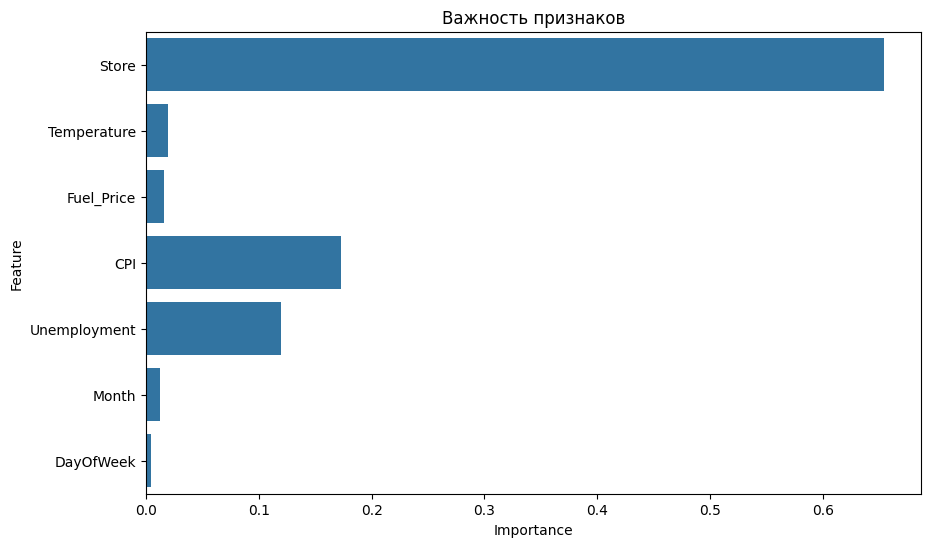

In [34]:
# Важность признаков
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Важность признаков")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


MAPE на валидационной выборке: 0.0651


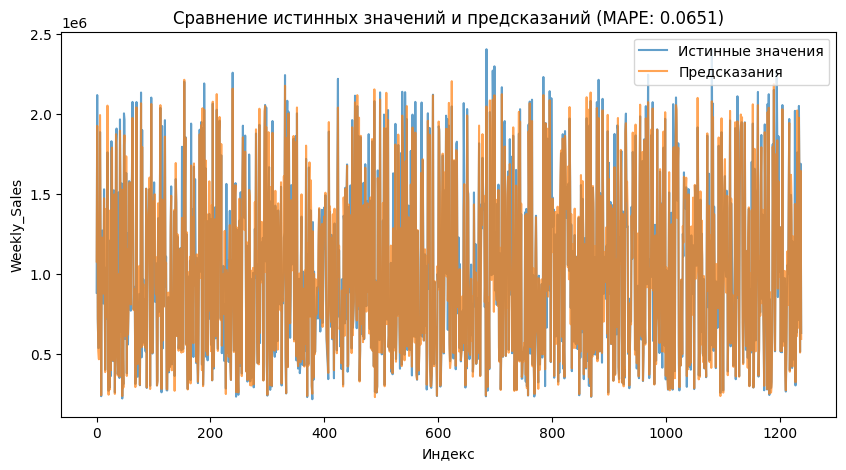

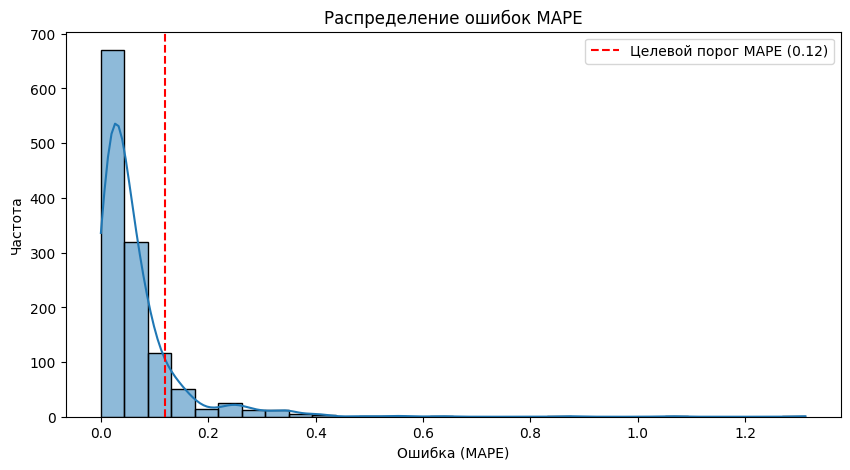

In [35]:
# Оценка метрики MAPE
mape = mean_absolute_percentage_error(y_val, y_val_pred)
print(f"MAPE на валидационной выборке: {mape:.4f}")

# Визуализация ошибки MAPE
plt.figure(figsize=(10, 5))
plt.plot(y_val.values, label="Истинные значения", alpha=0.7)
plt.plot(y_val_pred, label="Предсказания", alpha=0.7)
plt.title(f"Сравнение истинных значений и предсказаний (MAPE: {mape:.4f})")
plt.xlabel("Индекс")
plt.ylabel("Weekly_Sales")
plt.legend()
plt.show()

# График распределения ошибок (MAPE)
errors = np.abs((y_val - y_val_pred) / y_val)
plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=30, kde=True)
plt.axvline(0.12, color='r', linestyle='--', label='Целевой порог MAPE (0.12)')
plt.title("Распределение ошибок MAPE")
plt.xlabel("Ошибка (MAPE)")
plt.ylabel("Частота")
plt.legend()
plt.show()


In [36]:
# Предсказания на тестовых данных
y_predict = model.predict(test_data)

# Формирование файла submission.csv
submission = pd.DataFrame({
    "source_attractiveness": y_predict
})
submission.to_csv("submission.csv", index_label="ID")

print("Файл submission.csv успешно сохранен.")


Файл submission.csv успешно сохранен.
